In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import NMF, LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

In [2]:
AppleSupport_df = pd.read_csv("/Users/kamininayyar/Downloads/Apple_support.csv")
AppleSupport_df.head(2)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,interaction_tweet,interaction_author,interaction_tweet_at,Client interaction time,Support interaction time,TTR
0,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0,@applesupport https://t.co/nv0yucs0lb,115854,Tue Oct 31 22:17:40 +0000 2017,22:17:40,22:27:49,0 days 00:10:09
1,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0,@applesupport the newest update. i️ made sure ...,115854,Tue Oct 31 22:31:23 +0000 2017,22:31:23,22:36:27,0 days 00:05:04


### b) Cleaning...continued 


In [3]:
import re
import string
from langdetect import detect

tagging_regex = re.compile(r"@\S*")
url_pattern = re.compile(r'https?://\S+|www\.\S+')
signature_pattern = re.compile(r"-\S*")
weird_thing_pattern = re.compile(r"\^\S*")
new_line_pattern = re.compile(r"\n+\S*")

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "IMMA": "I am going to",
    "2NITE": "tonight",
    "DMED": "mesaged",
    'DM': "message",
    "SMH": "I am dissapointed"
}

# Thanks to https://stackoverflow.com/a/43023503/3971619
contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}

# Reference : https://stackoverflow.com/a/49986645/3971619
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

# Thanks to user sudalairajkumar
def remove_url(string):
    return url_pattern.sub(r'', string)

def remove_chat_words_and_contractions(string):
    new_text = []
    for word in string.split(' '):
        if word.upper() in chat_words.keys():
            new_text += chat_words[word.upper()].lower().split(' ')
        if word.lower() in contractions.keys():
            new_text += contractions[word.lower()].split(' ')
        else:
            new_text.append(word)
            
    return ' '.join(new_text)

def remove_signature(text):
    return signature_pattern.sub(r'', text)
    



In [4]:
# Thanks to user sudalairajkumar
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_message(message):
    # Remove user taggings
    message = re.sub(tagging_regex, '', message) 
    
    # Remove the emojis
    message = remove_emoji(message)
    
    # Remove urls
    message = remove_url(message)
    
    # Remove signatures
    message = remove_signature(message)
    
    # Remove the chat words and contractions
    message = remove_chat_words_and_contractions(message)
    
    # Remove weird things
    message = weird_thing_pattern.sub(r'', message)

    # Change new line to dot
    message = new_line_pattern.sub(r'.', message)
    
    # Remove punctuation
    message = remove_punctuation(message)
    
    # Remove start and end whitespace
    message = message.strip()
    
    # Make multiple spaces become a single space
    message = ' '.join(message.split())
  
    
    # If not in english, return empty string
    #if message and len(message) > 15:
        #if detect(message) != 'en':
            #return ""
    
    return message

for i in AppleSupport_df:
    AppleSupport_df['interaction_tweet'] = AppleSupport_df.apply(lambda row: clean_message(row['interaction_tweet']), axis=1)

In [5]:
AppleSupport_df.head(1)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,interaction_tweet,interaction_author,interaction_tweet_at,Client interaction time,Support interaction time,TTR
0,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0,,115854,Tue Oct 31 22:17:40 +0000 2017,22:17:40,22:27:49,0 days 00:10:09


In [6]:
# Removing columns
apple_sup_df = AppleSupport_df.drop(['author_id','inbound','created_at','response_tweet_id',
                                    'in_response_to_tweet_id','interaction_author','interaction_tweet_at',
                                    'Client interaction time','Support interaction time','TTR'], axis = 1)

In [7]:
apple_sup_df.head(2)

,tweet_id,text,interaction_tweet
0,696,@115854 We're here for you. Which version of t...,
1,699,@115854 Lets take a closer look into this issu...,the newest update i made sure to download it y...


In [8]:
apl_sup_df = apple_sup_df.drop(['text'],axis=1)
apl_sup_df.head(5)

,tweet_id,interaction_tweet
0,696,
1,699,the newest update i made sure to download it y...
2,701,tried resetting my settings restarting my phon...
3,703,this is what it looks like
4,705,i have an iphone 7 plus and yes i do


In [9]:
#Let's remove most frequent words

In [10]:
counter = Counter()
for text in apl_sup_df["interaction_tweet"].values:
    for word in text.split():
        counter[word] += 1
        
counter.most_common(15)

[('the', 87458),
 ('i', 75855),
 ('my', 55778),
 ('to', 49292),
 ('what', 36372),
 ('it', 34931),
 ('and', 34352),
 ('is', 33621),
 ('you', 32217),
 ('f', 29716),
 ('a', 28872),
 ('this', 25745),
 ('on', 22967),
 ('phone', 21676),
 ('as', 21133)]

In [11]:
frequent_words = set([w for (w, wc) in counter.most_common(300)])
def remove_frequent_words(corpus):
    return " ".join([word for word in str(corpus).split() if word not in frequent_words])

apl_sup_df['interaction_tweet'] = apl_sup_df['interaction_tweet'].apply(lambda corpus: remove_frequent_words(corpus))
apl_sup_df.head()

,tweet_id,interaction_tweet
0,696,
1,699,newest made sure yesterday
2,701,resetting restarting
3,703,looks
4,705,


In [12]:
apl_sup_df.shape

(106648, 2)

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

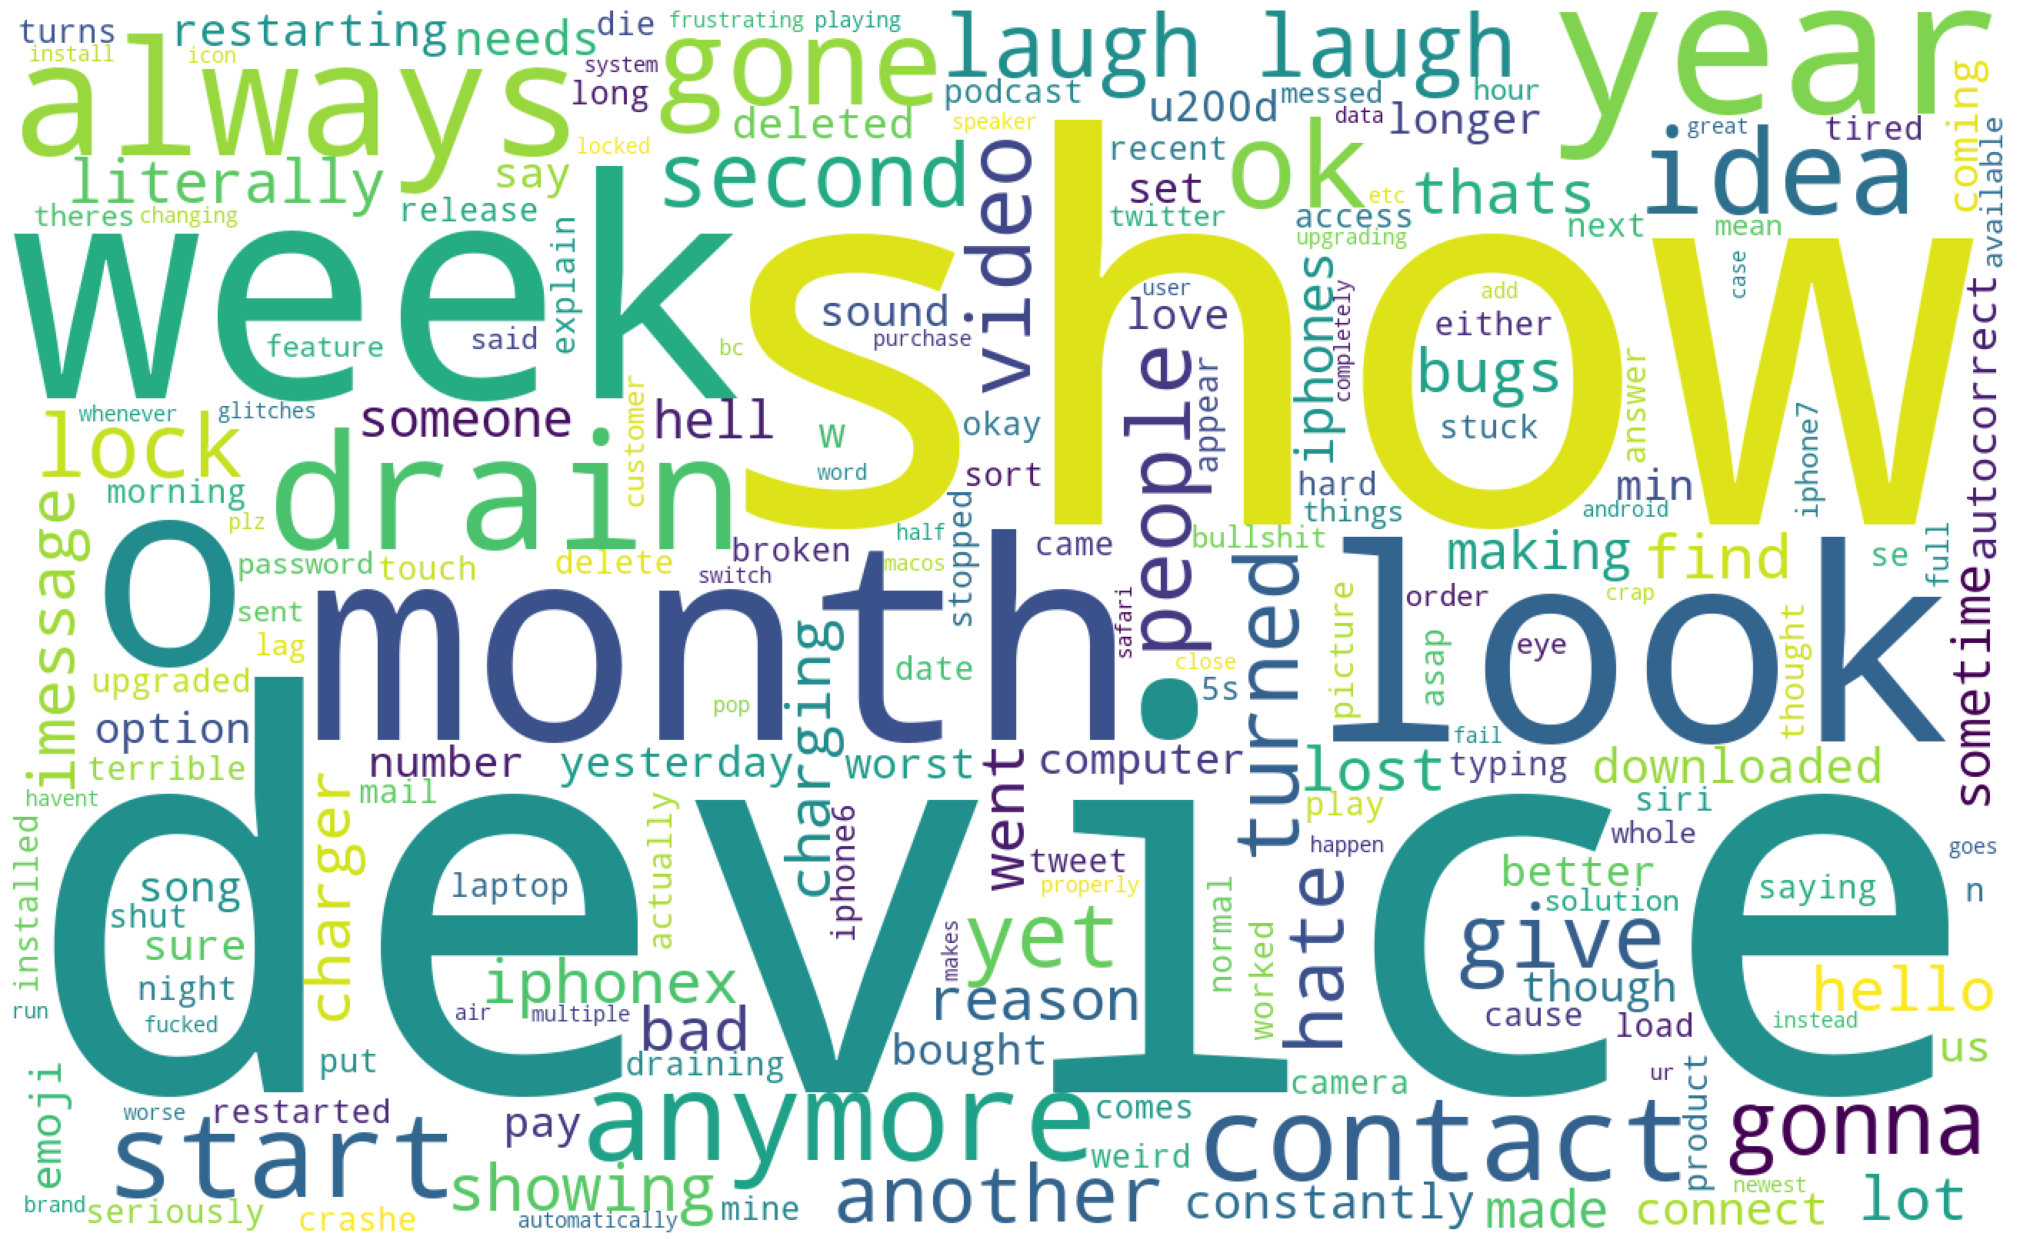

In [14]:
comment_words = '' 

for val in apl_sup_df['interaction_tweet']:     
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1300,height = 800,background_color ='white',min_font_size = 10).generate(comment_words) 
                    
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [15]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in apl_sup_df["interaction_tweet"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,device,917
1,few,911
2,here,908
3,camera,905
4,touch,903
5,another,896
6,turned,893
7,itself,892
8,gone,891
9,always,890


# Sentiment Analysis

In [16]:
# now the data is clean. 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kamininayyar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
sia = SentimentIntensityAnalyzer()

texts =apl_sup_df['interaction_tweet'].astype(str).tolist()
sen=[]
#
for text in texts:
    #print(1)
    sentiment = sia.polarity_scores(text)
    sen.append(sentiment['compound'])

In [19]:
apl_sup_df['sentiment']=sen
apl_sup_df.head()

,tweet_id,interaction_tweet,sentiment
0,696,,0.0000
1,699,newest made sure yesterday,0.3182
2,701,resetting restarting,0.0000
3,703,looks,0.0000
4,705,,0.0000


In [20]:
apl_sup_df.sentiment.value_counts()

 0.0000    57408
-0.4767     1526
 0.2960     1464
-0.3400     1457
-0.1027     1214
           ...  
 0.0083        1
 0.2350        1
-0.7464        1
-0.2283        1
-0.8155        1
Name: sentiment, Length: 1420, dtype: int64

In [21]:
#apl_sup_df.sentiment = [0 if each <= 0 else 1 for each in apl_sup_df.sentiment]

In [22]:
apl_sup_df.sentiment = [0 if each <= 0 else 1 for each in apl_sup_df.sentiment]
apl_sup_df.head()

,tweet_id,interaction_tweet,sentiment
0,696,,0
1,699,newest made sure yesterday,1
2,701,resetting restarting,0
3,703,looks,0
4,705,,0


In [23]:
apl_sup_df.sentiment.value_counts()

0    87369
1    19279
Name: sentiment, dtype: int64

### c) Tokenization

In [24]:
tokenized_tweet= apl_sup_df['interaction_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0                                 []
1    [newest, made, sure, yesterday]
2            [resetting, restarting]
3                            [looks]
4                                 []
Name: interaction_tweet, dtype: object

### d) CountVectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(apl_sup_df['interaction_tweet'])
text_counts

<106648x40328 sparse matrix of type '<class 'numpy.int64'>'
	with 463429 stored elements in Compressed Sparse Row format>

# Train-Test split

In [26]:
from sklearn.model_selection import train_test_split
X=text_counts
y=apl_sup_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

### 1) Complement NB

In [27]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 86.92%
------------------------------------------------
Confusion Matrix:
       0     1
0  15246  2246
1    544  3294
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     17492
           1       0.59      0.86      0.70      3838

    accuracy                           0.87     21330
   macro avg       0.78      0.86      0.81     21330
weighted avg       0.90      0.87      0.88     21330



## RESULTS:  
accuracy is 86.92 % for the complementNB model. For each of 100 total number of prediction, in average, our model can predict 86 cases correctly

### The confusion matrix:
True Positive: The actual value was 15246 negative reviews and the model predicted 15246 negative reviews
True Negative: The actual value was 3294 positive reviews and the model predict 3294 negative reviews
False Positive: The actual values was 2246 postive reviews and the model predicted 2246 negative reviews
False Negative: The actual values was 544 negative reviews and the model preditced 544 positive reviews

## Classification Report:

Precision:

Negative review: the ratio correctly predicted negative review observations to the total predicted negative review observations is 0.97
Positive review: the ratio correctly predicted positive review observations to the total predicted positive review observations is 0.59
## Recall:
Negative review: the ratio of correctly predicted negative review observations to the all observations in actual class is 0.87
Positive review: the ratio of correctly predicted positive review observations to the all observations in actual class is 0.86
## F1 Score:
is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are 0.92 and 0.70

We can apply the same interpretation for the following models:

### 2) Multinomial NB Model

In [28]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 90.89%
------------------------------------------------
Confusion Matrix:
       0     1
0  17120   372
1   1572  2266
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17492
           1       0.86      0.59      0.70      3838

    accuracy                           0.91     21330
   macro avg       0.89      0.78      0.82     21330
weighted avg       0.91      0.91      0.90     21330



### 3) Bernoulli NB model

In [29]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 86.31%
------------------------------------------------
Confusion Matrix:
       0     1
0  16833   659
1   2262  1576
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17492
           1       0.71      0.41      0.52      3838

    accuracy                           0.86     21330
   macro avg       0.79      0.69      0.72     21330
weighted avg       0.85      0.86      0.85     21330



## Plotting Confusion Matrices

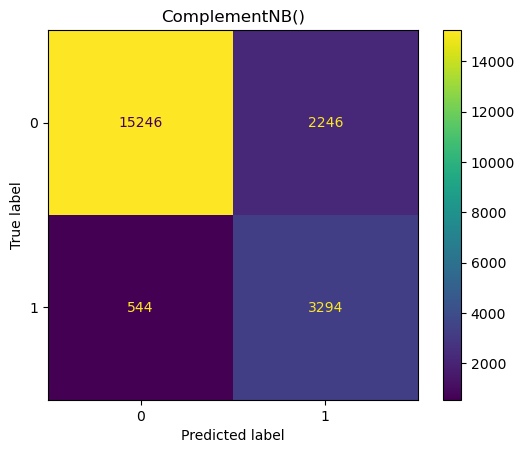

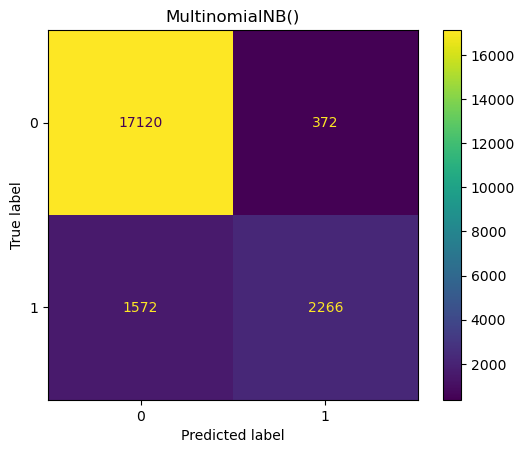

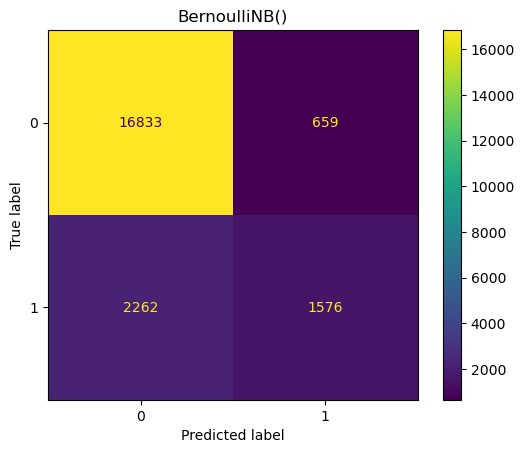

In [30]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

0.9094019247628663 0.9094019471061408 0.9232025312367914


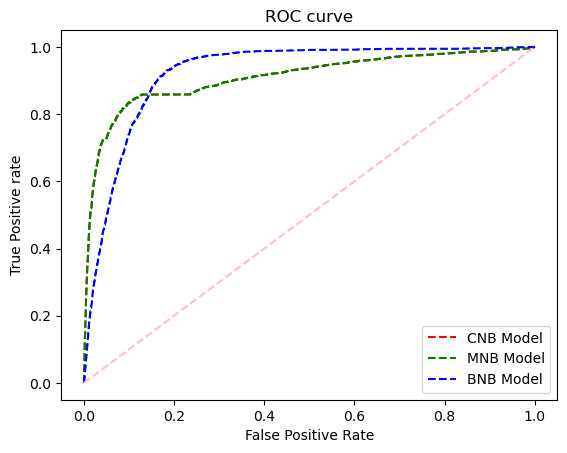

In [31]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


## Trying different ngrams

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(apl_sup_df['interaction_tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, apl_sup_df['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy for BIGRAM(2,2):',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy for BIGRAM(2,2): 79.34%


In [33]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(apl_sup_df['interaction_tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, apl_sup_df['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy or TRIGRAM(3,3):',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy or TRIGRAM(3,3): 76.61%


## TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(apl_sup_df['interaction_tweet'])

In [35]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, apl_sup_df['sentiment'],test_size=0.20,random_state=30)



In [36]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 84.74%


In [37]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 86.26%


In [38]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 87.11%


In [39]:
## THE END 

In [40]:
##REfrences: https://github.com/lethuyngocan/Sentimental-Analysis-Using-Naive-Bayes-Classification/blob/master/sentimental-analysis-using-naive-bayes-classifier.ipynb